# Introduction

In this tutorial, we will present an introduction on Zipf's Law and show some of the ways to observe the relavence of this law in all sorts of data. As part of this tutorial, we will go over the following topics:
*  What is Zipf's Law?
*  Data collection from The Internet: Finding Our Inital Corpus
*  More Complex Sources: A "Living" Corpus
*  Further Reaches of Zipf's Law

For our purposes, we will start by analyzing works of literature from Project Gutenburg, then we will move on to blog posts from select Tumblr users using the [Tumblr REST API](https://www.tumblr.com/docs/en/api/v2). You will have to create your own keys to use the API, so instructions on that will be included later.   

### What is Zipf's Law?

For more auditory learners, [here is a cool video about Zipf's Law (and a few other things) by the Youtube Channel Vsauce](https://dev.twitter.com/rest/public). Basically, Zipf's Law, popularized by linguist George Zipf, states that, given any corpus of natural languages utterance, the frequency of any word is inversely proportional to its rank in the frequency table. Stated otherwise, the $n$th most frequent word should  appear about $\frac{A}{n}$ times in the given corpus, where $A$ is the frequency of the word that appears the most. Also, the data from these sorts of observations correspond to a power law. If you took a corpus of word utterances and plotted them on a rank vs. frequency log-log graph (that is, the $x$-axis will be log(rank) and the $y$-axis will be log(frequency)), Zipf's Law predicts that, regardless of the corpus, the graph will be pretty close to linear. 

### Data Collection From The Internet: Finding Our Corpus

Before we can analyse how to apply Zipf's Law to data, we have to have some data! Right now, we're going to import the libraries and install some files that will be needed for the rest of this tutorial. Make sure the following commands work for you before continuing:

In [ ]:
import string
import io, json

from collections import Counter

import nltk
from nltk.tokenize import RegexpTokenizer

import numpy as np
import matplotlib.pyplot as plt

# nltk.download('punkt')

As a start, we're going to parse all of the words from a static source and analyze its frequencies. [Here](http://www.gutenberg.org/files/76/76.txt), you can download the complete text of the book *The Adventures of Huckleberry Finn* by Mark Twain (available, along with other public domain books, on [Project Gutemberg](https://www.gutenberg.org/)). Download this as a .txt file and save it in the same folder as this tutorial. Also, for the sake of this tutorial, I removed the Project Gutemburg info from the top of the text file so that the only text left would be text from the book.

With the file downloaded, we're first going to tokenize the words. We'll be using the Natural Language Toolkit (nltk for short) to parse the text file and break it up into individual words (otherwise known as "tokenizing" the file). To make things simpler, we'll be putting all the tokenization code into a function called `tokenize_text` that we can reference later.

In [34]:
def tokenize_text(file_src):
    # Creating a tokenizer based on a regular expression for all words (strings of alphabetical characters)
    tokenizer = RegexpTokenizer(r'\w+')

    # Reading and modifying our text slightly
    text = open(file_src).read()
    text = text.translate(string.maketrans('',''), string.punctuation) # Removing punctuation from our file

    # Tokenizing the text
    freqs = Counter([w.lower() for w in tokenizer.tokenize(text)]).most_common()
    words = [h[0] for h in freqs]
    counts = [h[1] for h in freqs]
    return freqs, words, counts

huck_finn_freqs, huck_finn_words, huck_finn_counts = tokenize_text("huckleberry_finn.txt")
print huck_finn_freqs[0:5]

[('and', 6309), ('the', 5036), ('i', 3212), ('a', 2999), ('to', 2997)]


First, we create a `RegexpTokenizer`, which allows us to tokenize the text based on a given regular expression. In this case, we're splitting the text up into all of the words, or sequences of characters with only alphanumeric characters. Then, we open the text file containing the book and tokenize it, make every word lowercase, and then use the `Counter` object to find the frequencies of each word. Finally, in preparation for graphing, we split the `freqs` into two lists: one with the words themselves, `words`, and one with the counts of each word, `counts`. After all is said and done, we call the function with the _Huckleberry Finn_ text filepath as input and output the 5 most frequent words!

Well, now that we have out data, let's plot it!

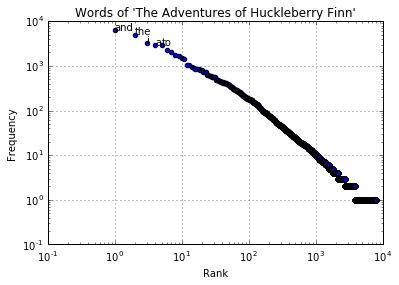

In [90]:
%matplotlib inline

def zipf_plot(words, counts, title="", top_n=5):
    # Make a log-log scatter plot of the rank vs. frequency
    plt.scatter(range(1, len(counts) + 1), counts)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Frequency')
    plt.xlabel('Rank')
    plt.title(title)
    plt.grid(True)

    # Add labels for the top_n most frequent words
    for i in range(top_n):
        plt.annotate(words[i], xy=(i+1,counts[i]))
        
zipf_plot(huck_finn_words, huck_finn_counts, 'Words of \'The Adventures of Huckleberry Finn\'')

So this looks pretty alright to me! As you can (sort of) see, the most popular word, 'and', is on the top left of the graph, followed by 'the', 'I', 'a', and 'to'. Now, to intuitively see how closely this data set abides to Zipf's Law, we're going to graph the same data again, but this time, we'll include a reference line that represents the "ideal" Zipf distribution, one with a slope of $\frac{A}{n}$.

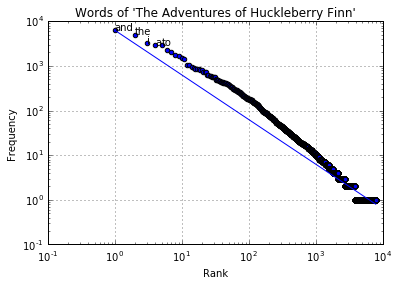

In [89]:
def zipf_ideal_line(num_words, most_freq):
    ranks = np.arange(1, num_words + 1)
    y_fit = lambda rank: 1.0/rank * most_freq
    plt.loglog(ranks, y_fit(ranks))

zipf_plot(huck_finn_words, huck_finn_counts, 'Words of \'The Adventures of Huckleberry Finn\'')
zipf_ideal_line(len(huck_finn_words), huck_finn_counts[0])

From here, we can see that our code trends slightly upwards from the ideal Zipf line, but, nevertheless, the log-log plot still does take on a roughly linear shape, and the data is very close to the line.

Using the functions we wrote earlier, we can do the same kind of analysis on other literary works. Below, you can find similar comparison graphs (plus the top five most frequent words) for three other works - [_Great Expectations_ by Charles Dickens](https://www.gutenberg.org/files/1400/1400-0.txt), [_A Modest Proposal_ by Johnathan Swift](http://www.gutenberg.org/cache/epub/1080/pg1080.txt), and [_Frankenstein_ by Mary Shelley](http://www.gutenberg.org/cache/epub/84/pg84.txt). And, once again, we'll write a function `zipf_text` that'll do all the parsing, graphing, and visual comparison in one go.

In [61]:
def zipf_text(filepath, title):
    freqs, words, counts = tokenize_text(filepath)
    zipf_plot(words, counts, 'Words of \'' + title +  '\'')
    zipf_ideal_line(len(words), counts[0])
    print freqs[0:5]

[('the', 8296), ('and', 7025), ('i', 6403), ('to', 5123), ('of', 4538)]


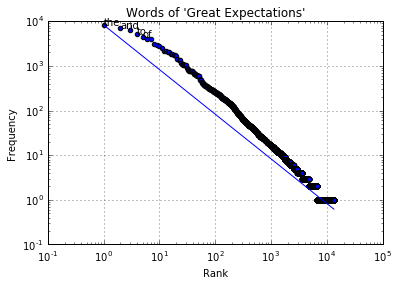

In [62]:
zipf_text('great_expectations.txt', 'Great Expectations')

[('the', 346), ('of', 257), ('to', 188), ('and', 184), ('a', 149)]


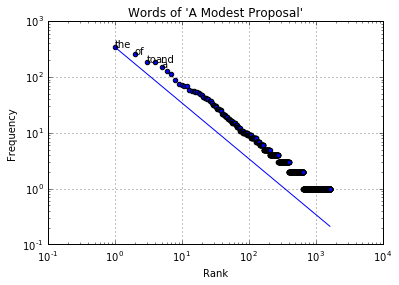

In [63]:
zipf_text('a_modest_proposal.txt', 'A Modest Proposal')

[('the', 4364), ('and', 3040), ('i', 2841), ('of', 2757), ('to', 2172)]


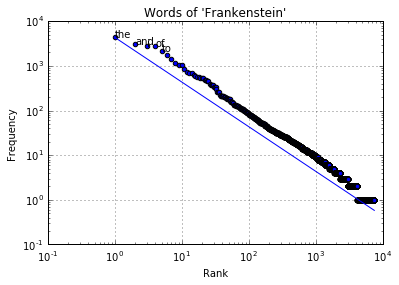

In [64]:
zipf_text('frankenstein.txt', 'Frankenstein')

## More Complex Sources: A "Living" Corpus

In theory, we could continue making graphs for every great work of literature on Project Gutenburg, but I believe that would do a disservice to only show examples from books and relatively contained sources of words. What happens if we explore a slightly more dynamic corpus? Here, we'll look to Tumblr, and try to see if the text posts on a particular blog are Zipfian.

## Installing the Python Tumblr Library

For the next part of this tutorial, we'll need to install [Pytumblr](https://github.com/tumblr/pytumblr) to query the Tumblr API. You can install this simply by running: 
```python
pip install pytumblr
```
You'll also need the BeautifulSoup HTML parser library, which you can get by running:
```python
pip install BeautifulSoup
```
Make sure the following commands run without issue before continuing!

In [31]:
import pytumblr
from bs4 import BeautifulSoup

From here on out, to follow along with the tutorial, you will need a Tumblr account, and you will have to generate OAuth keys so that you'll be able to make API calls. [Here](https://www.tumblr.com/oauth/apps) is a resource that explains how to get consumer keys and tokens, and once you have these, you can save them in a JSON file structured similarly to the following:

```javascript
{
    "consumer_key": ...,
    "consumer_secret": ...,
    "token": ...,
    "token_secret": ...
}
```

Now that we have our accounts set up and our keys generated, we can finally get to using the Tumblr API! First, we'll create an API object using the `pytumblr` package and authenticate it with our keys.

In [111]:
def authenticate(config_filepath):
    with io.open(config_filepath) as cred:
        creds = json.load(cred)
        return pytumblr.TumblrRestClient(
            creds['consumer_key'],
            creds['consumer_secret'],
            creds['token'],
            creds['token_secret']
        )
    
client = authenticate("config_secret.json")
# client.info()

If you uncomment the last line, and all of your keys are correct, it should print out JSON information about your Tumblr profile!

Now, we're going to write a function to get a certain number of text posts from a given blog. Since Tumblr's API is _rate-limited_, which means there is a limit to the number of queries we can execute in a given timespan and the amount of data we can get back from each query, we'll be essentially iterating through properties of the queries to get the number of posts that we want.

In [ ]:
def get_text_posts(blog_name, count=100):
    # Query parameters: we want the first 20 textb posts after offset 0 (the most recent post)
    params = {
        'type': 'text',
        'limit': 20,
        'offset': 0
    }
    response_results = []
    
    # We can only retrieve 20 posts at a time, so we'll make
    # successive calls for 20 posts, changing the offset every time
    for offset in range(0, count, params['limit']):
        time.sleep(0.2)
        params['offset'] = offset
        if count - offset < params['limit']: 
            # If we need to get less than limit posts, 
            # set the limit to the number of remaining posts
            params['limit'] = count - offset
        
        # Call the query to retrieve the posts
        new_response = client.posts(blog_name, **params)
        response_results += [post['body'] for post in new_response['posts']]
    return response_results

posts = get_text_posts('fuckyeahtxtposts', 1000)

Here, `posts` represents a list of the 1000 most recent text posts from the blog fuckyeahtxtposts. Tumblr's API returns the text of each post in HTML, so we can use the BeautifulSoup parser to extract the text from the blocks of HTML.

In [82]:
# Parse the HTML of each individual post to just get the raw text
posts_txt = [BeautifulSoup(html, "html.parser").get_text() for html in posts]
print posts_txt[0]

ensyme:
me after a quiet day in: Time for a quiet night in



Like earlier, we can write a function that will tokenize each of these posts so that we can view the word counts.

In [84]:
def tokenize_tumblr_posts(posts):
    # Creating a tokenizer based on a regular expression for all words (strings of alphabetical characters)
    tokenizer = RegexpTokenizer(r'\w+')

    texts = []
    for post in posts:
        # Remove regular punctuation
        text = ''.join(x for x in post.replace(':', ': ') if x not in string.punctuation and x != '\n').lower()
        
        # Replace unicode quotes with whitespace
        text = text.replace(u'\u2018', '').replace(u'\u2019', '').replace(u'\u201c','').replace(u'\u201d', '')
        
        texts.append(text)
    
    # For convenience sake, put all of the texts in one string
    all_text = " ".join(text for text in texts)
        
    freqs = Counter([w.lower() for w in tokenizer.tokenize(all_text)]).most_common()
    words = [h[0] for h in freqs]
    counts = [h[1] for h in freqs]
    return freqs, words, counts
    
fytp_freqs, fytp_words, fytp_counts = tokenize_tumblr_posts(posts_txt)
print fytp_freqs[:5]

[(u'the', 702), (u'i', 685), (u'and', 609), (u'a', 601), (u'to', 588)]


Like before, we get a pretty similar spattering of common English words. But what do they look like graphed?

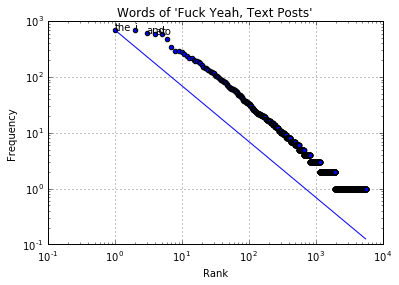

In [92]:
zipf_plot(fytp_words, fytp_counts, 'Words of \'Fuck Yeah, Text Posts\'')
zipf_ideal_line(len(fytp_words), fytp_counts[0])

Immediately, we can see that our data is actually pretty far from our ideal line. However, the really incredible thing is that, after a certain point, roughly seven points after the start, the data still looks linear, with a very similar slope to our ideal line! The top few words all have counts pretty similar to each other, which makes sense, given that this "corpus" comes various different writers rather than just a singular author. Regardless, it's still cool to see that the relationship is still preserved!

### Further Reaches of Zipf's Law

Though we won't go super in-depth in this, the fact is that Zipf's Law actually applies to way more than just language. As a matter of fact, there are a lot of data sets, language related or not, that are pretty Zipfian! As a final example, we'll look again to the Tumblr API, but this time, instead of looking at the text of each post, we'll look at the number of "notes" each post has (a note, in Tumblr, is defined as a like or a reblog).

We can write a similar function to before to get the notes from all of the posts on a blog.

In [ ]:
def get_blog_notes(blog_name):
    blog = client.blog_info(blog_name)
    print blog
    count = 1000
    
    params = {
        'notes_info': True,
        'limit': 20,
        'offset': 0
    }
    response_results = []

    for offset in range(0, count, params['limit']):
        time.sleep(0.2)
        params['offset'] = offset
        if count - offset < params['limit']: 
            # If we need to get less than limit posts, 
            # set the limit to the number of remaining posts
            params['limit'] = count - offset
        
        # Call the query to retrieve the posts
        new_response = client.posts(blog_name, **params)
        try:
            response_results += [post['note_count'] for post in new_response['posts']]
        except KeyError:
            continue
    return response_results

note_counts = sorted(get_blog_notes('fuckyeahtxtposts'), reverse=True)

In [121]:
print note_counts[:5]

[1518439, 1500018, 1455870, 1270485, 1234786]


And with this data, we can plot the graph like we did before:

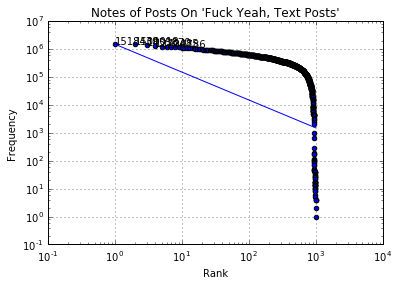

In [122]:
zipf_plot(note_counts, note_counts, 'Notes of Posts On \'Fuck Yeah, Text Posts\'')
zipf_ideal_line(len(note_counts), note_counts[0])

Alright, this isn't very Zipfy, admittedly...

However, it's still very interesting to see how many different corpuses do fall into this mysterious pattern! The jury's still out as to what exactly causes Zipf's Law to be true in languages and many non-linguistic data sets (unlike the one above). Some theorists cite [preferential attachment processes](https://en.wikipedia.org/wiki/Preferential_attachment) as a contributing factor, if not the direct culprit. Regardless, I hope the skills presented in this tutorial have been helpful, and I hope I've sparked your interest in discovering the Zipfiness of the world!